<a href="https://colab.research.google.com/github/ajay4198/Airbnb-analysis/blob/main/airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import datetime as dt
import plotly.express as px
%matplotlib inline 

In [2]:
from google.colab import drive
drive.mount("/content/drive/")


Mounted at /content/drive/


In [3]:
df=pd.read_csv('/content/drive/MyDrive/Almabetter certificates/dataset of airbnb/Airbnb NYC 2019.csv')

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
df.count()

id                                48895
name                              48879
host_id                           48895
host_name                         48874
neighbourhood_group               48895
neighbourhood                     48895
latitude                          48895
longitude                         48895
room_type                         48895
price                             48895
minimum_nights                    48895
number_of_reviews                 48895
last_review                       38843
reviews_per_month                 38843
calculated_host_listings_count    48895
availability_365                  48895
dtype: int64

In [7]:
df.isnull().sum().sort_values(ascending = False)[0:4]

last_review          10052
reviews_per_month    10052
host_name               21
name                    16
dtype: int64

In [8]:
df.drop(['id','host_name','last_review'], axis=1, inplace=True)
df.head(4)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194


In [9]:
df['reviews_per_month'].fillna(0,inplace=True)
df['name'].fillna(0,inplace=True)

<h1>EDA</h1>

In [10]:
# Finding the top host ID 
top_host=df.host_id.value_counts().head(10)
print(top_host)

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64


In [11]:
# find the top hosting list in caluculated host listing column

top_host_list=df.calculated_host_listings_count.max()
top_host_list

327

In [12]:
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')

# create a data frame for top host id and top calculated host list

top_host_df=pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'Host_id','host_id':'P_count'},inplace=True)
top_host_df


,Host_id,P_count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96
5,12243051,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


[Text(0, 0, '7503643'),
 Text(0, 0, '12243051'),
 Text(0, 0, '16098958'),
 Text(0, 0, '22541573'),
 Text(0, 0, '30283594'),
 Text(0, 0, '61391963'),
 Text(0, 0, '107434423'),
 Text(0, 0, '137358866'),
 Text(0, 0, '200380610'),
 Text(0, 0, '219517861')]

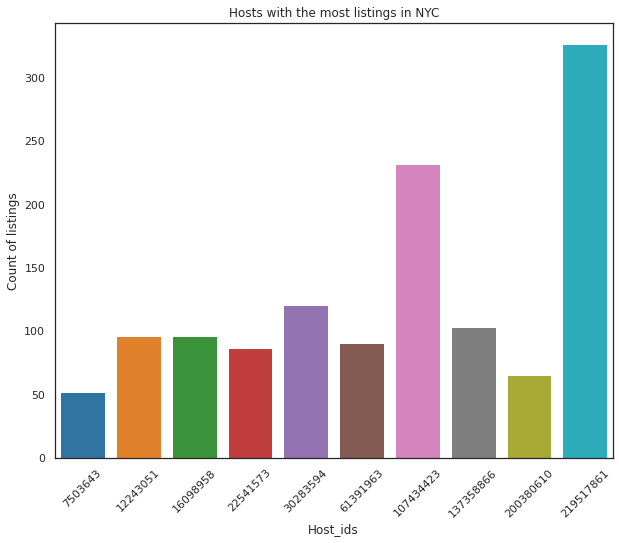

In [13]:
graph=sns.barplot(x="Host_id",y='P_count', data=top_host_df, palette='tab10')
graph.set_title('Hosts with the most listings in NYC')
graph.set_ylabel('Count of listings')
graph.set_xlabel('Host_ids')
graph.set_xticklabels(graph.get_xticklabels(), rotation=45)

In [19]:
# Let's find out more about our neiberhood presented 'Brookly','Manhattan','Queens','Staten Island','Bronx'

# Brookly
brookly=df.loc[df['neighbourhood_group']=='Brookly']
brookly_price=brookly[['price']]
# Manhattan
manhattan=df.loc[df['neighbourhood_group']=='Manhattan']
manhattan_price=manhattan[['price']]
# Queens
queens=df.loc[df['neighbourhood_group']=='Queens']
queens_price=queens[['price']]
# Staten Island
staten_island=df.loc[df['neighbourhood_group']=='Staten_Island']
staten_island_price=staten_island[['price']]
# Bronx
bronx=df.loc[df['neighbourhood_group']=='Bronx']
bronx_price=bronx[['price']]

# put all the price df in the list
price_list_neighbourhood_groups=[brookly_price,manhattan_price,queens_price,staten_island_price,bronx_price]



In [32]:
#creating an empty list that we will append later with price distributions for each neighbourhood_group
p_l_b_n_2=[]
#creating list with known values in neighbourhood_group column
new_list=['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']
#creating a for loop to get statistics for price ranges and append it to our empty list
for x in price_list_neighbourhood_groups:
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Stats'}, inplace=True)
    p_l_b_n_2.append(i)
#changing names of the price column to the area name for easier reading of the table    
p_l_b_n_2[0].rename(columns={'price':new_list[0]}, inplace=True)
p_l_b_n_2[1].rename(columns={'price':new_list[1]}, inplace=True)
p_l_b_n_2[2].rename(columns={'price':new_list[2]}, inplace=True)
p_l_b_n_2[3].rename(columns={'price':new_list[3]}, inplace=True)
p_l_b_n_2[4].rename(columns={'price':new_list[4]}, inplace=True)
#finilizing our dataframe for final view    
stat_df=p_l_b_n_2
stat_df=[df.set_index('Stats') for df in stat_df]
stat_df=stat_df[0].join(stat_df[1:])
stat_df

,Brooklyn,Manhattan,Queens,Staten Island,Bronx
Stats,,,,,
min,NaN,0.0,10.0,NaN,0.0
25%,NaN,95.0,50.0,NaN,45.0
50%,NaN,150.0,75.0,NaN,65.0
75%,NaN,220.0,110.0,NaN,99.0
max,NaN,10000.0,10000.0,NaN,2500.0


Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood-group')

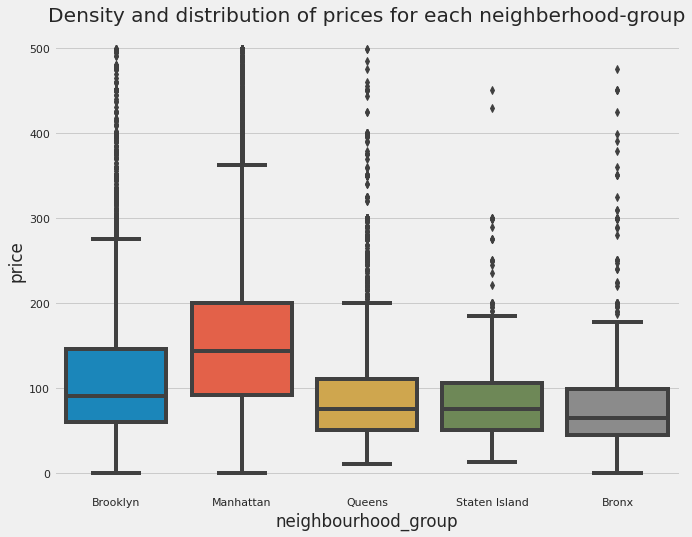

In [33]:
# we can see the in this table there are some valuse is extreme big, therefore we need to remove the them for the sake of a better visualization
# creating a sub-dataframe with no extreme values less then 500.
price=df[df.price<500]
grapgh=sns.boxplot(data=price,x='neighbourhood_group',y='price')
grapgh.set_title('Density and distribution of prices for each neighberhood-group')


In [36]:
# let's grabb just top 10 neighbourhoods that have most listings in them
df.neighbourhood.value_counts().head(10)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

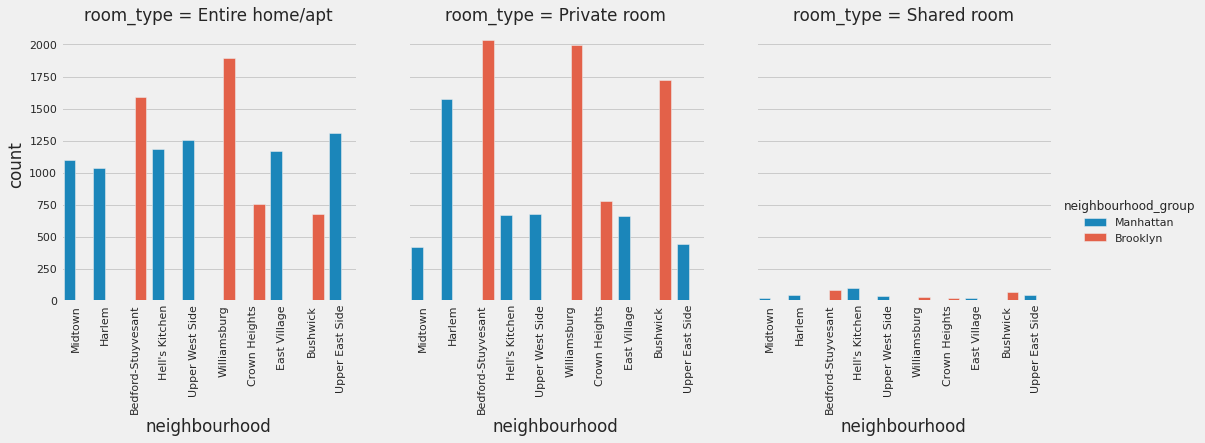

In [39]:
top_neighbourhood=df.loc[df['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick','Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]
gra=sns.catplot(x='neighbourhood',hue='neighbourhood_group',col='room_type',data=top_neighbourhood,kind='count')
gra.set_xticklabels(rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


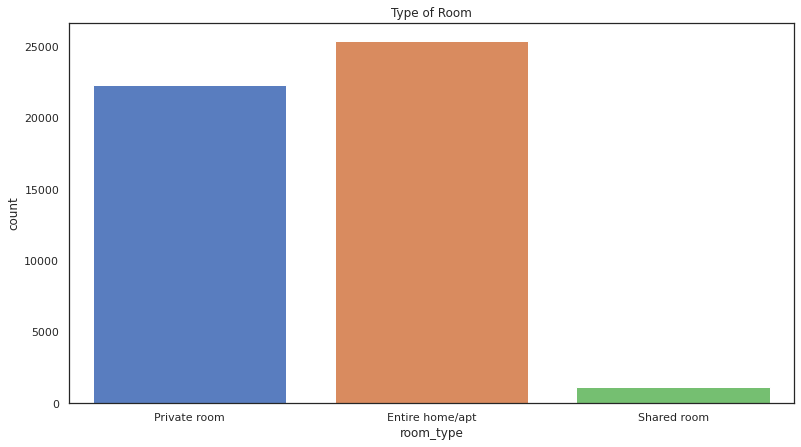

In [15]:
#find the unique values in each columns \
df['room_type'].unique()

plt.figure(figsize=(13,7))
plt.title("Type of Room")
sns.countplot(df.room_type, palette="muted")
fig = plt.gcf()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


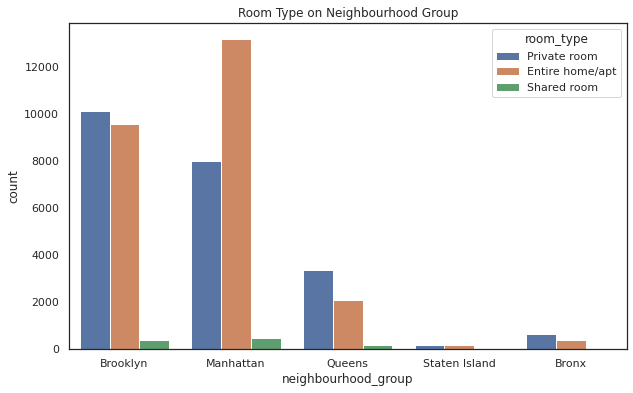

In [16]:
plt.figure(figsize=(10,6))
plt.title('Room Type on Neighbourhood Group')
sns.countplot(df.neighbourhood_group,hue=df.room_type)
plt.show()

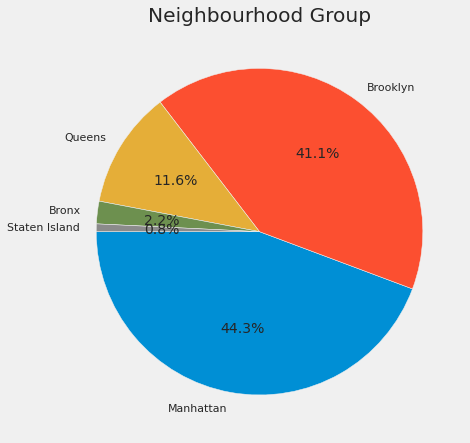

In [17]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group")
g = plt.pie(df.neighbourhood_group.value_counts(), labels=df.neighbourhood_group.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()